In [ ]:
#!pip install pandas
#!pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


relu
relu
relu
   Activation Function  Learning Rate  Epochs  Hidden Layers  Train Accuracy  \
0             logistic           0.01     100              2        0.699275   
1             logistic           0.01     100              3        0.687500   
2             logistic           0.01     200              2        0.567935   
3             logistic           0.01     200              3        0.717391   
4             logistic           0.10     100              2        0.715580   
5             logistic           0.10     100              3        0.689312   
6             logistic           0.10     200              2        0.689312   
7             logistic           0.10     200              3        0.717391   
8                 tanh           0.01     100              2        0.567935   
9                 tanh           0.01     100              3        0.692029   
10                tanh           0.01     200              2        0.567935   
11                tanh   

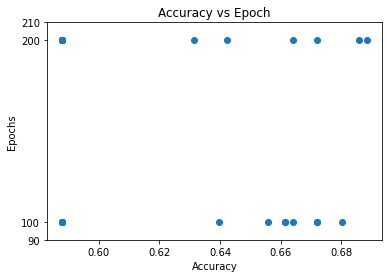

In [50]:
import numpy as np
import pandas as pd
import itertools
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

class NeuralNet:
    def __init__(self, dataFile, header=True):
        self.raw_input = pd.read_csv(dataFile)


    # TODO: Write code for pre-processing the dataset, which would include
    # standardization, normalization,
    #   categorical to numerical, etc
    def preprocess(self):
        self.processed_data = self.raw_input
        self.processed_data = self.processed_data[["1","4","6","9","10"]].copy()
        self.processed_data.loc[self.processed_data['10'] >= 2, '10'] = 0
        self.processed_data.tail(-1)
        return 0

    # TODO: Train and evaluate models for all combinations of parameters
    # specified in the init method. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #       the models in a single plot. The plot should be color coded i.e.
    #       different color for each model

    @ignore_warnings(category=ConvergenceWarning)
    def train_evaluate(self):
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)
        X = self.processed_data.iloc[:, 0:(ncols - 1)]
        y = self.processed_data.iloc[:, (ncols-1)]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y)

        # Below are the hyperparameters that you need to use for model
        #   evaluation
        activations = ['logistic', 'tanh', 'relu']
        learning_rate = [0.01, 0.1]
        max_iterations = [100, 200] # also known as epochs
        num_hidden_layers = [2, 3]
        combos = [activations, learning_rate, max_iterations, num_hidden_layers]
        # Create the neural network and be sure to keep track of the performance
        #   metrics

        combination = [p for p in itertools.product(*combos)]
        accuracy_list, epoch_list, train_errors, test_errors, model_results = ([] for i in range(5))

        for i in combination:
            mlp = MLPClassifier(solver='lbfgs', alpha=i[1],
                            activation = i[0],
                            hidden_layer_sizes= i[3],
                            max_iter = i[2])
            
            # Plot the model history for each model in a single plot
            # model history is a plot of accuracy vs number of epochs
            # you may want to create a large sized plot to show multiple lines
            # in a same figure.

            mlp.fit(X_train,y_train)
            train_predictions = mlp.predict(X_train)
            test_predictions = mlp.predict(X_test)

            #print("[ " + str(i[0]) + ", learning rate = " + str(i[1]) 
            #      + ", epochs = " + str(i[2]) + ", hidden layers = " + str(i[3]))

            train_acc = accuracy_score(y_train,train_predictions)
            test_acc= accuracy_score(y_test,test_predictions)
            round(train_acc, 3)
            round(test_acc, 3)
            accuracy_list.append(test_acc)
            epoch_list.append(i[2])
            
            train_er_score = mlp.score(X_train, y_train)
            test_er_score = mlp.score(X_test, y_test)
            train_errors.append(train_er_score)
            test_errors.append(test_er_score)
            
            round(train_er_score, 3)
            round(test_er_score, 3)

            if(test_acc > 0.6 and test_er_score < 0.65): 
              print(i[0])

            model_results.append([i[0],i[1],i[2],i[3],train_acc,test_acc,train_er_score,test_er_score])

        #print(accuracy_list)
        #print(epoch_list)

        plt.scatter(accuracy_list,epoch_list)
        plt.xlabel('Accuracy')
        plt.ylabel('Epochs')
        plt.title('Accuracy vs Epoch')
        yticks = [90,100,200,210]
        plt.yticks(yticks)
        model_data = pd.DataFrame(model_results)
        model_data.columns = ['Activation Function','Learning Rate',
                              'Epochs','Hidden Layers','Train Accuracy','Test Accuracy'
                              ,'Train Error','Test Error']
        print(model_data)
        return 0




if __name__ == "__main__":
    neural_network = NeuralNet("https://raw.githubusercontent.com/Hlopez490/ML01/main/A02_Data.csv") # put in path to your file
    neural_network.preprocess()
    neural_network.train_evaluate()